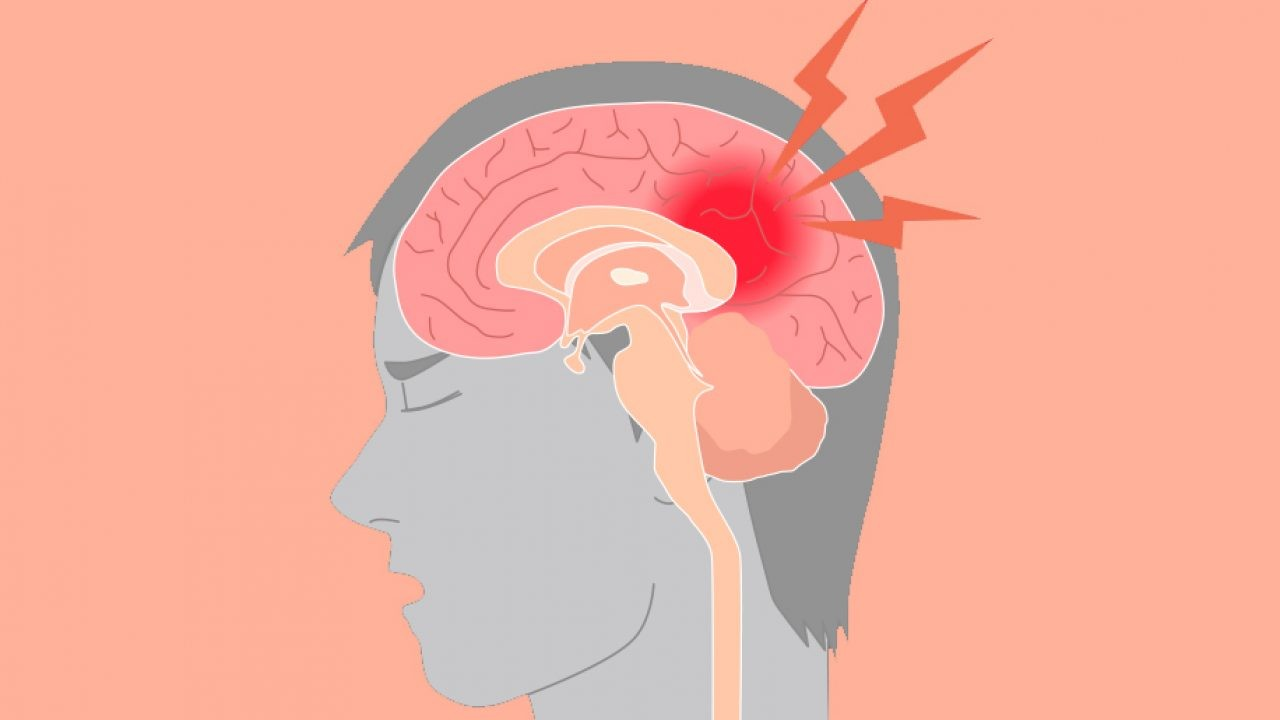

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [421]:
my_ds= pd.read_csv('Stroke dataset.csv')

my_ds.shape

(5110, 12)

**Data Exploration and Preprocessing**

In [422]:
my_ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [423]:
my_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [424]:
clean_data = my_ds.drop(columns=['id']).copy()

In [425]:
col = ["gender", "hypertension", "heart_disease", "smoking_status",
       "ever_married", "work_type", "Residence_type", "stroke"]

for i in col:
    print(f"=Values in {i}\n{clean_data[i].value_counts()}\n")

=Values in gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

=Values in hypertension
hypertension
0    4612
1     498
Name: count, dtype: int64

=Values in heart_disease
heart_disease
0    4834
1     276
Name: count, dtype: int64

=Values in smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

=Values in ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

=Values in work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

=Values in Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

=Values in stroke
stroke
0    4861
1     249
Name: count, dtype: int64



In [426]:
# Replace 1 Other value with Male
clean_data["gender"] = clean_data["gender"].replace("Other", "Male")

In [427]:
clean_data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


<Axes: xlabel='bmi'>

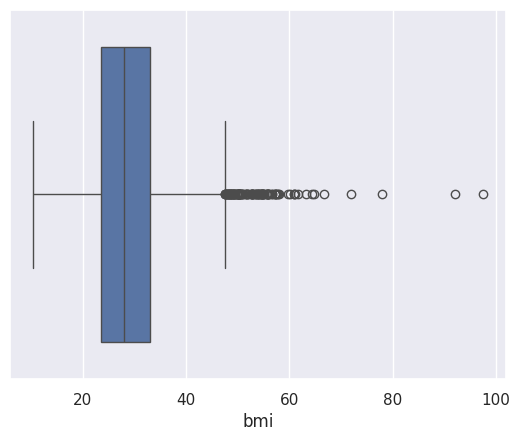

In [428]:
sns.boxplot(x=clean_data['bmi'])


In [429]:
# Fill missing 'bmi' values
clean_data['bmi'].fillna(clean_data['bmi'].median(), inplace=True)

In [430]:
clean_data.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [431]:
clean_data.shape

(5110, 11)

In [432]:
# check duplicated data
clean_data.duplicated().sum()

np.int64(0)

In [433]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


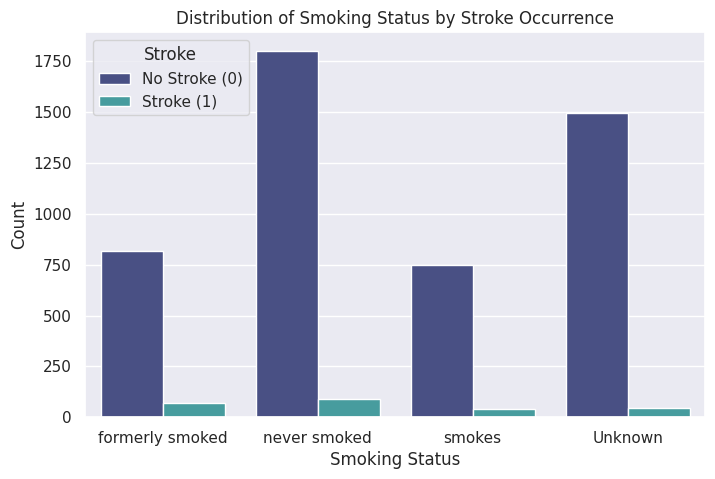

In [434]:
plt.figure(figsize=(8, 5))
sns.countplot(x="smoking_status", hue="stroke", data=clean_data, palette="mako")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Distribution of Smoking Status by Stroke Occurrence")
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

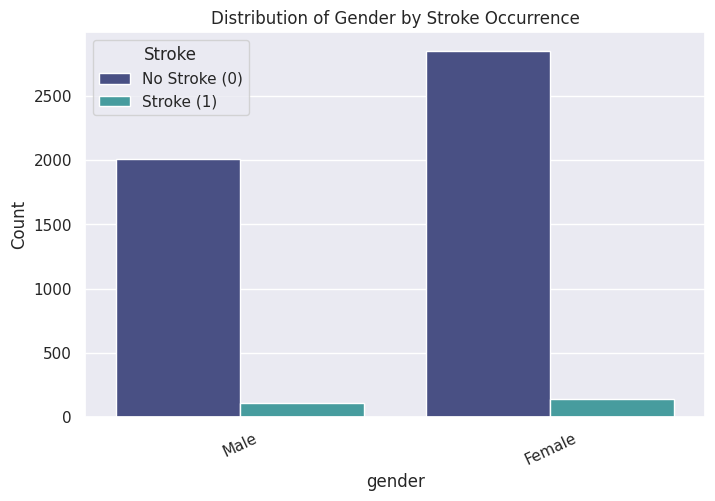

In [435]:
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", hue="stroke", data=clean_data, palette="mako")
plt.xlabel("gender")
plt.ylabel("Count")
plt.title("Distribution of Gender by Stroke Occurrence")
plt.xticks(rotation=25)
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])

plt.show()


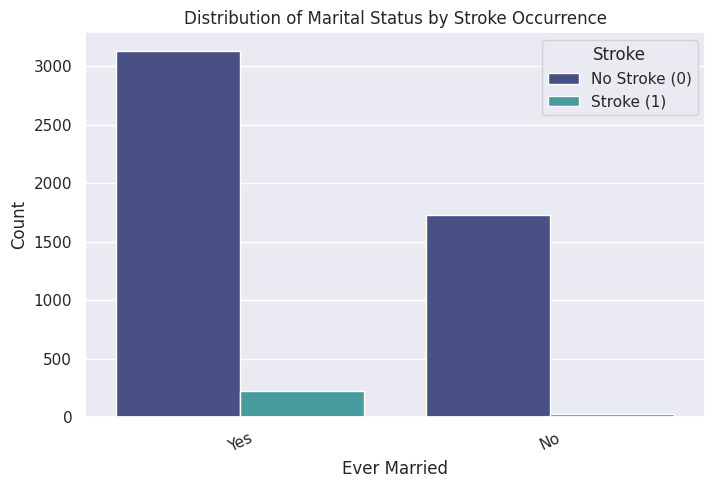

In [436]:
plt.figure(figsize=(8, 5))
sns.countplot(x="ever_married", hue="stroke", data=clean_data, palette="mako")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.title("Distribution of Marital Status by Stroke Occurrence")
plt.xticks(rotation=25)
plt.legend(title="Stroke", labels=["No Stroke (0)", "Stroke (1)"])

plt.show()




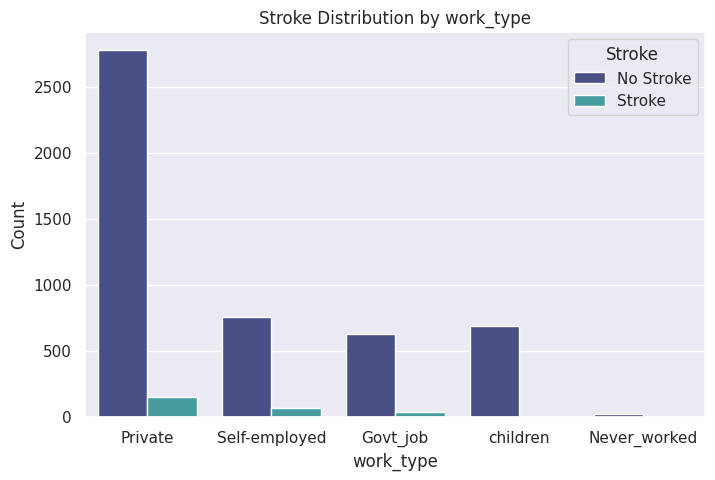

In [437]:
# Bar chart comparing hypertension to stroke
plt.figure(figsize=(8, 5))
sns.countplot(x="work_type", hue="stroke", data=clean_data, palette="mako")
plt.xlabel("work_type")
plt.ylabel("Count")
plt.title("Stroke Distribution by work_type")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()


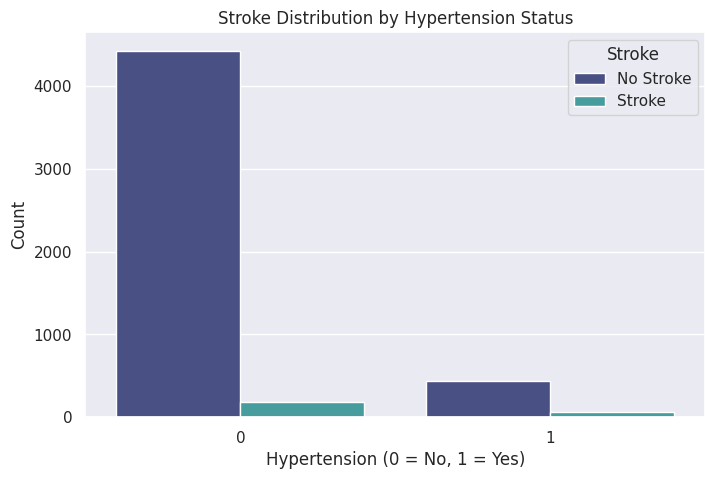

In [438]:
# Bar chart comparing hypertension to stroke
plt.figure(figsize=(8,5))
sns.countplot(x="hypertension", hue="stroke", data=clean_data, palette="mako")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Stroke Distribution by Hypertension Status")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()


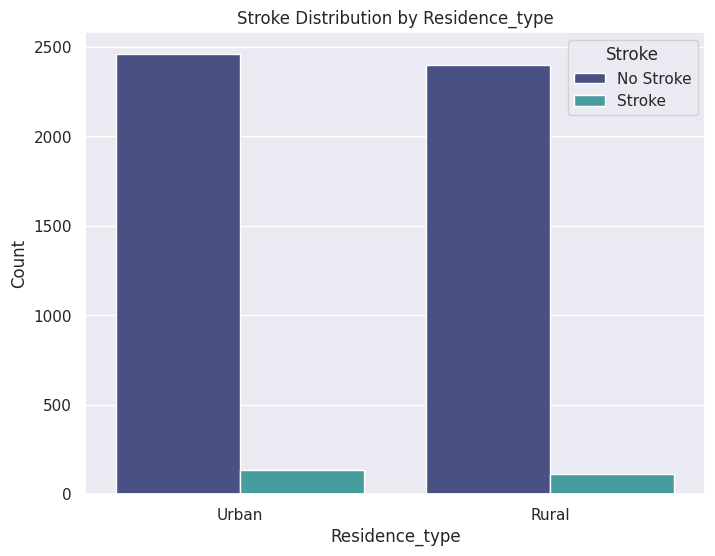

In [439]:
# Bar chart comparing hypertension to stroke
plt.figure(figsize=(8, 6))
sns.countplot(x="Residence_type", hue="stroke", data=clean_data, palette="mako")
plt.xlabel("Residence_type")
plt.ylabel("Count")
plt.title("Stroke Distribution by Residence_type")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()


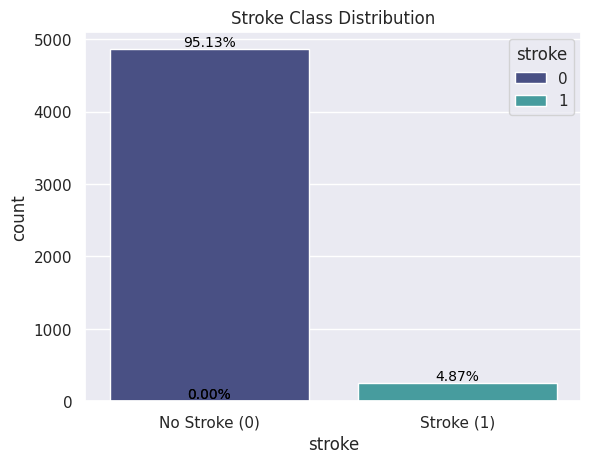

In [440]:
stroke_counts = my_ds['stroke'].value_counts()
total = len(clean_data)
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=clean_data, x='stroke', hue='stroke', palette='mako')
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.2f}%'
    ax.annotate(percent,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
ax.set_xticklabels(['No Stroke (0)', 'Stroke (1)'])
ax.set_title('Stroke Class Distribution')
plt.show()


only 4.87% of all entries have a positive stroke diagnosis. This means that the class we want to predict in the end is strongly underrepresented. This is problematic because algorithms will almost exclusively train on negative samples, and will not be able to capture much information about the positive ones.


Distribution Plot

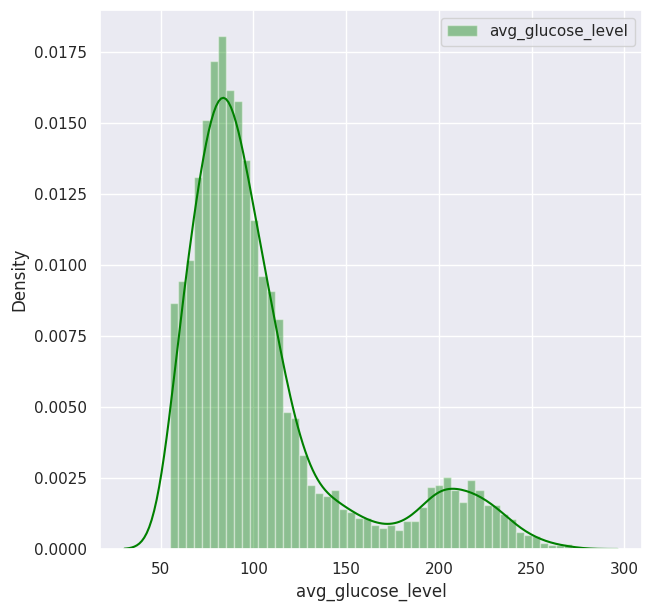

In [441]:
fig = plt.figure(figsize=(7,7))
sns.distplot(clean_data.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

Most patients have normal glucose levels, but there’s a smaller group with very high levels, which could signal stroke risk

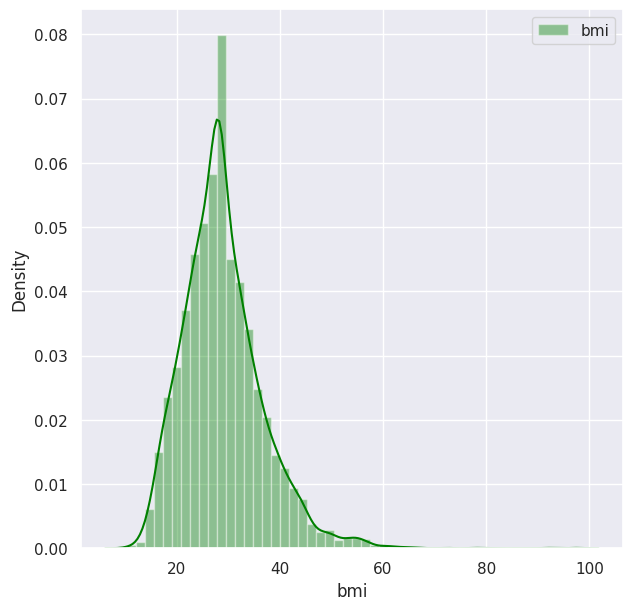

In [442]:
fig = plt.figure(figsize=(7,7))
sns.distplot(clean_data.bmi,color='green',label='bmi',kde=True)
plt.legend()

Most patients in the dataset have a BMI around 25, but a small group shows very high BMI values, indicating obesity. Since stroke risk increases with obesity.

(10.0, 100.0)

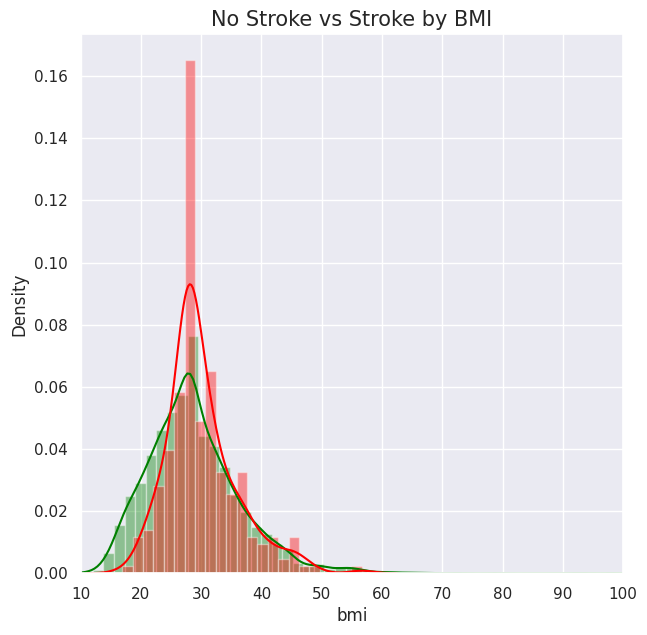

In [443]:
plt.figure(figsize=(7,7))
sns.distplot(clean_data[clean_data['stroke'] == 0]['bmi'],color='green')
sns.distplot(clean_data[clean_data['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

We can see that stroke patients tend to cluster more around higher BMI values, which supports that being overweight increases stroke risk.

(30.0, 330.0)

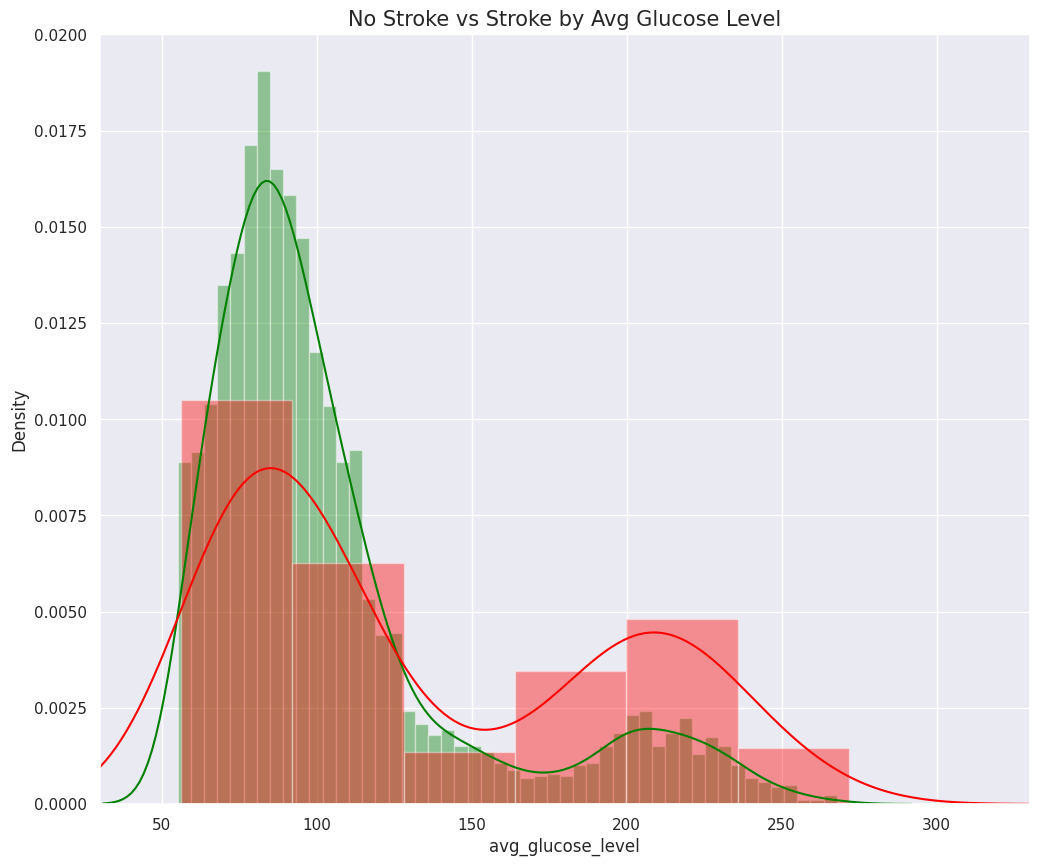

In [444]:
plt.figure(figsize=(12,10))
sns.distplot(clean_data[clean_data['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(clean_data[clean_data['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

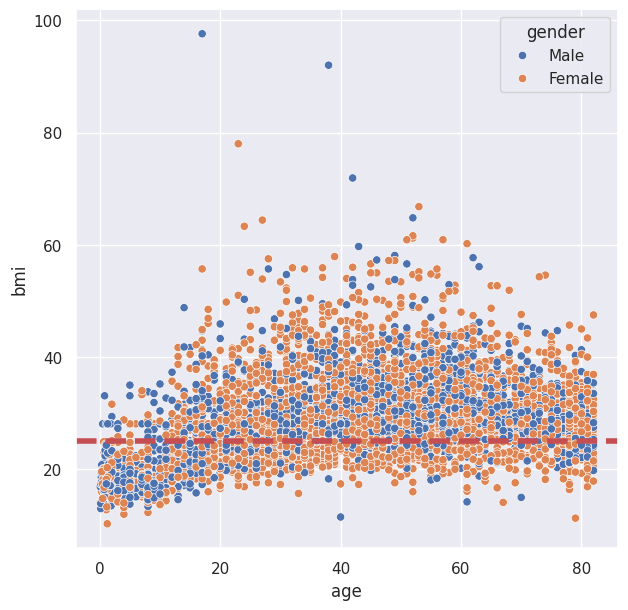

In [445]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=clean_data,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

This plot shows that BMI generally increases with age for both males and females. Since higher BMI in older individuals is linked to stroke risk

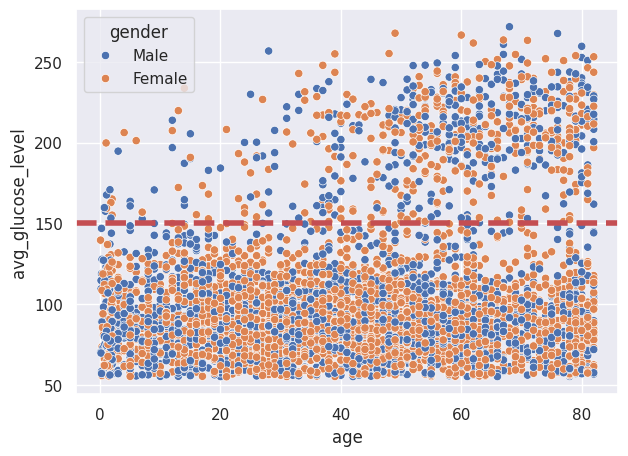

In [446]:
fig = plt.figure(figsize=(7,5))
graph = sns.scatterplot(data=clean_data,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

This plot shows that glucose levels tend to rise with age, and many patients over 60 cross the 150 mg/dL threshold. Since high glucose is a stroke risk factor

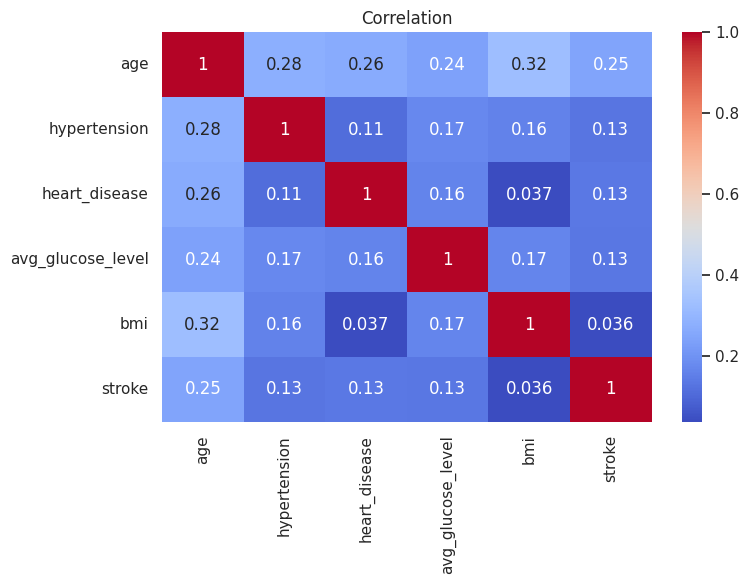

In [447]:
# Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(clean_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.tight_layout()
plt.show()

This heatmap shows that while age has the strongest correlation with stroke, other features like glucose, hypertension, and heart disease still show meaningful patterns.

In [448]:
clean_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Feature Engineering**

In [449]:
selected_features = ['gender', 'age', 'hypertension','ever_married' ,'heart_disease',
                    'avg_glucose_level','bmi', 'smoking_status' ,'stroke']
data_selected = clean_data[selected_features]
data_selected.head()

,gender,age,hypertension,ever_married,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,Yes,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,Yes,0,202.21,28.1,never smoked,1
2,Male,80.0,0,Yes,1,105.92,32.5,never smoked,1
3,Female,49.0,0,Yes,0,171.23,34.4,smokes,1
4,Female,79.0,1,Yes,0,174.12,24.0,never smoked,1


I selected features based on medical relevance and evidence from my exploratory analysis. These include both clinical conditions (like hypertension, heart disease, and glucose) and lifestyle or demographic factors (age, gender, smoking). Together, they give the model a comprehensive view of stroke risk.

To better capture this pattern, I grouped patients into clinically relevant age bands, using the age ranges reported in the research by (Yao et al., 2023).

In [450]:
data_selected = data_selected.copy()

def categorize_age(age):
    if age < 50:
        return 'young_adult'
    elif 50 <= age <= 80:
        return 'middle_aged'
    else:
        return 'very_old'

data_selected['age_group'] = data_selected['age'].apply(categorize_age)

In [451]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'bmi_0_underweight'
    elif 18.5 <= bmi < 25:
        return 'bmi_1_healthy'
    elif 25 <= bmi < 30:
        return 'bmi_2_overweight'
    elif 30 <= bmi < 35:
        return 'bmi_3_obesity_class_1'
    elif 35 <= bmi < 40:
        return 'bmi_4_obesity_class_2'
    else:
        return 'bmi_5_obesity_class_3'

data_selected['bmi_category'] = data_selected['bmi'].apply(categorize_bmi)

I used the BMI categories defined by the World Health Organization (WHO) and the Centers for Disease Control and Prevention (CDC). These are globally accepted medical standards for assessing body weight and health risk.

In [452]:
def glucose_category(glucose):
    if glucose < 70:
        return 'glucose_0_<70'
    elif 70 <= glucose <= 84:
        return 'glucose_1_70_84'
    elif 85 <= glucose <= 99:
        return 'glucose_2_85_99'
    elif 100 <= glucose <= 109:
        return 'glucose_3_100_109'
    elif 110 <= glucose <= 125:
        return 'glucose_4_110_125'
    elif 126 <= glucose <= 139:
        return 'glucose_5_126_139'
    else:
        return 'glucose_6_140_plus'

# Applying glucose category
data_selected['glucose_category'] = data_selected['avg_glucose_level'].apply(glucose_category)
# Dropping the original column once
data_selected.drop('avg_glucose_level', axis=1, inplace=True)


I categorized glucose levels based on American Diabetes Association (ADA) and CDC guidelines. For example, glucose above 126 mg/dL is considered diabetic, while 100–125 is prediabetic. These categories helped the model focus on medical risk groups rather than raw numbers. After encoding, I dropped the original feature to reduce noise.

In [453]:
glucose_mapping = {
    'glucose_0_<70': 0,
    'glucose_1_70_84': 1,
    'glucose_2_85_99': 2,
    'glucose_3_100_109': 3,
    'glucose_4_110_125': 4,
    'glucose_5_126_139': 5,
    'glucose_6_140_plus': 6
}

data_selected['glucose_category_encoded'] = data_selected['glucose_category'].map(glucose_mapping)

In [454]:
bmi_mapping = {
    'bmi_0_underweight': 0,
    'bmi_1_healthy': 1,
    'bmi_2_overweight': 2,
    'bmi_3_obesity_class_1': 3,
    'bmi_4_obesity_class_2': 4,
    'bmi_5_obesity_class_3': 5
}

data_selected['bmi_category_encoded'] = data_selected['bmi_category'].map(bmi_mapping)

In [455]:
data_selected['age_glucose_interaction'] = data_selected['glucose_category_encoded'] * data_selected['age']
data_selected['bmi_glucose_interaction'] = data_selected['glucose_category_encoded'] * data_selected['bmi_category_encoded']

To prepare the dataset for machine learning, all categorical features were encoded using one-hot encoding:

In [456]:
categorical_features = [
    'gender',
    'age_group',
    'glucose_category',
    'bmi_category',
    'ever_married',
    'smoking_status',
]

data_encoded = pd.get_dummies(data_selected, columns=categorical_features, drop_first=True)

data_encoded.tail()

,age,hypertension,heart_disease,bmi,stroke,glucose_category_encoded,bmi_category_encoded,age_glucose_interaction,bmi_glucose_interaction,gender_Male,...,glucose_category_glucose_6_140_plus,bmi_category_bmi_1_healthy,bmi_category_bmi_2_overweight,bmi_category_bmi_3_obesity_class_1,bmi_category_bmi_4_obesity_class_2,bmi_category_bmi_5_obesity_class_3,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5105,80.0,1,0,28.1,0,1,2,80.0,2,False,...,False,False,True,False,False,False,True,False,True,False
5106,81.0,0,0,40.0,0,6,5,486.0,30,False,...,True,False,False,False,False,True,True,False,True,False
5107,35.0,0,0,30.6,0,1,3,35.0,3,False,...,False,False,False,True,False,False,True,False,True,False
5108,51.0,0,0,25.6,0,6,2,306.0,12,True,...,True,False,True,False,False,False,True,True,False,False
5109,44.0,0,0,26.2,0,2,2,88.0,4,False,...,False,False,True,False,False,False,True,False,False,False


**Model Training & Tuning**

In [457]:
#features and target
X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)



In [458]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Handling Class Imbalance (SMOTE)

In [459]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [460]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))

Before SMOTE: Counter({0: 3889, 1: 199})
After SMOTE: Counter({0: 3889, 1: 3889})


**Feature Selection**
select the top 10 most predictive features from the training data. This helps reduce dimensionality and improve model focus.

In [461]:
#  Selecting top k features based on ANOVA F-statistics
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test_scaled)

# Checking which features were selected
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected features:", selected_features.tolist())

Selected features: ['age', 'hypertension', 'heart_disease', 'glucose_category_encoded', 'age_glucose_interaction', 'bmi_glucose_interaction', 'age_group_young_adult', 'glucose_category_glucose_6_140_plus', 'bmi_category_bmi_2_overweight', 'ever_married_Yes']


Model Training

In [462]:
# Logistic Regression
model_lr = LogisticRegression( class_weight='balanced', random_state=42)
model_lr.fit(X_train_selected, y_train_balanced)

# Random Forest
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=200,max_depth = 10,min_samples_split = 10, random_state=42)
model_rf.fit(X_train_selected, y_train_balanced)

# xgb
scale_pos_weight = y_train_balanced.value_counts()[0] / y_train_balanced.value_counts()[1]

model_xgb = XGBClassifier(n_estimators=150,
    max_depth=5,
    learning_rate=0.1, scale_pos_weight=scale_pos_weight,

    eval_metric='logloss',
    random_state=42
)
model_xgb.fit(X_train_selected, y_train_balanced)

# lgbm
model_lgbm = LGBMClassifier(n_estimators=100,max_depth=10, scale_pos_weight=scale_pos_weight,
   random_state=42)
model_lgbm.fit(X_train_selected, y_train_balanced)

# mlp
model_mlp= MLPClassifier(hidden_layer_sizes=(30, 15),activation='relu',
    solver='adam',
    alpha=0.0001,   max_iter=300, random_state=42)
model_mlp.fit(X_train_selected, y_train_balanced)



[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 7778, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=300, random_state=42)

**Evaluation Metrics**

In [463]:
from tabulate import tabulate

def evaluate_model(model, name):
    y_pred = model.predict(X_test_selected)
    y_proba = model.predict_proba(X_test_selected)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_proba)
    roc = roc_auc_score(y_test, y_proba)

    cm = confusion_matrix(y_test, y_pred)

    print(f"\n Classification Report for {name} \n")
    print(classification_report(y_test, y_pred, digits=3))

    print(f"\nConfusion Matrix for {name}:\n")
    print(tabulate(cm, tablefmt="plain"))

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'PR AUC': pr_auc,
        'ROC AUC': roc,
        'True Positives': cm[1,1],
        'False Negatives': cm[1,0]
    })
model_results = []
evaluate_model(model_lr, "Logistic Regression")
evaluate_model(model_rf, "Random Forest")
evaluate_model(model_xgb, "XGB")
evaluate_model(model_lgbm, "LGBM")
evaluate_model(model_mlp, "MLP")



 Classification Report for Logistic Regression 

              precision    recall  f1-score   support

           0      0.986     0.733     0.841       972
           1      0.133     0.800     0.229        50

    accuracy                          0.736      1022
   macro avg      0.560     0.766     0.535      1022
weighted avg      0.944     0.736     0.811      1022


Confusion Matrix for Logistic Regression:

712  260
 10   40

 Classification Report for Random Forest 

              precision    recall  f1-score   support

           0      0.974     0.835     0.899       972
           1      0.149     0.560     0.235        50

    accuracy                          0.822      1022
   macro avg      0.561     0.698     0.567      1022
weighted avg      0.933     0.822     0.867      1022


Confusion Matrix for Random Forest:

812  160
 22   28

 Classification Report for XGB 

              precision    recall  f1-score   support

           0      0.961     0.916     0.938  

Sumary


In [464]:
# Summarize results
results_df = pd.DataFrame(model_results)

performance_metrics = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'PR AUC','ROC AUC']]
error_analysis = results_df[['Model', 'True Positives', 'False Negatives']]
print("\n Model Performance Metrics \n")
display(performance_metrics.round(3))


 Model Performance Metrics 



,Model,Accuracy,Precision,Recall,F1-Score,PR AUC,ROC AUC
0,Logistic Regression,0.736,0.133,0.80,0.229,0.248,0.839
1,Random Forest,0.822,0.149,0.56,0.235,0.130,0.791
2,XGB,0.885,0.146,0.28,0.192,0.131,0.784
3,LGBM,0.935,0.250,0.16,0.195,0.156,0.805
4,MLP,0.802,0.148,0.64,0.241,0.167,0.807


Best Recall: Logistic Regression — captures more real stroke cases

Balanced Performance: MLP — decent recall, precision, and F1

Highest Accuracy: LGBM — but with low recall (misses many stroke cases)

Low PR AUC: Most models struggle on this due to data imbalance

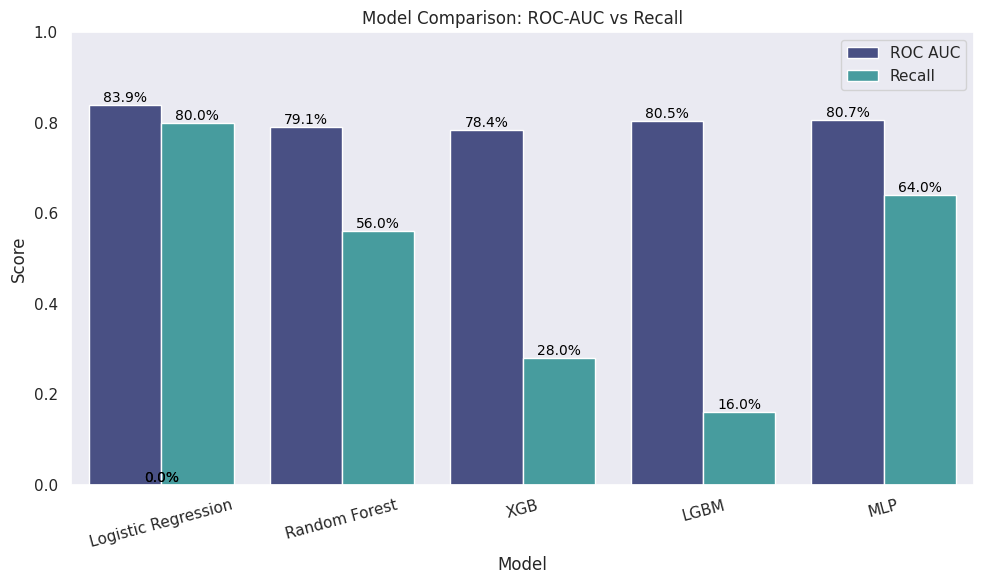

In [465]:
# Reshape DataFrame
melted = results_df.melt(
    id_vars='Model',
    value_vars=['ROC AUC', 'Recall'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=melted, x='Model', y='Score', hue='Metric',palette='mako')
plt.title('Model Comparison: ROC-AUC vs Recall')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{100 * height:.1f}%',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=10, color='black')

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


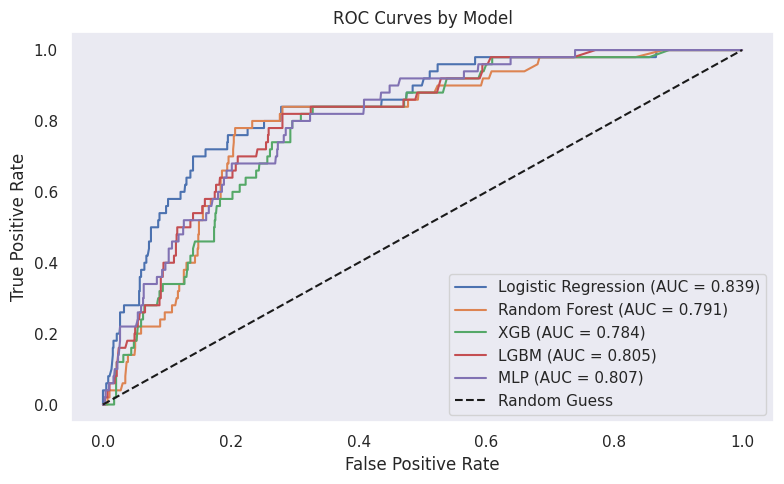

In [466]:
plt.figure(figsize=(8, 5))
for model, name in zip([model_lr, model_rf, model_xgb,model_lgbm, model_mlp],
                       ['Logistic Regression', 'Random Forest', 'XGB','LGBM','MLP']):
    y_proba = model.predict_proba(X_test_selected)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [467]:
best_model = results_df.sort_values('ROC AUC', ascending=False).iloc[0]
print(f" Best model: {best_model['Model']} with ROC AUC = {best_model['ROC AUC']:.3f}, Recall = {best_model['Recall']:.3f}")


 Best model: Logistic Regression with ROC AUC = 0.839, Recall = 0.800


**Hyperparameter Tuning (Logistic Regression)**

In [468]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced', None]
}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_selected, y_train_balanced)

best_logreg = grid_search.best_estimator_
display("Best parameters:", grid_search.best_params_)

# Evaluate
evaluate_model(best_logreg, "Logistic Regression_Tuned)")



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


'Best parameters:'

{'C': 0.01,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}


 Classification Report for Logistic Regression_Tuned) 

              precision    recall  f1-score   support

           0      0.986     0.675     0.801       972
           1      0.115     0.820     0.201        50

    accuracy                          0.682      1022
   macro avg      0.551     0.747     0.501      1022
weighted avg      0.944     0.682     0.772      1022


Confusion Matrix for Logistic Regression_Tuned):

656  316
  9   41


After tuning hyperparameters, Logistic Regression showed improved performance in stroke detection.

Ensemble Modeling

In [469]:
from sklearn.ensemble import VotingClassifier

#soft voting ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', best_logreg),
        ('xgb', model_xgb),
        ('mlp', model_mlp)
    ],
    voting='soft'
)
ensemble_model.fit(X_train_selected, y_train_balanced)

evaluate_model(ensemble_model, "Ensemble (LogReg + xgb + MLP)")



 Classification Report for Ensemble (LogReg + xgb + MLP) 

              precision    recall  f1-score   support

           0      0.982     0.826     0.897       972
           1      0.172     0.700     0.276        50

    accuracy                          0.820      1022
   macro avg      0.577     0.763     0.586      1022
weighted avg      0.942     0.820     0.867      1022


Confusion Matrix for Ensemble (LogReg + xgb + MLP):

803  169
 15   35


high recall of 70% for identifying at-risk (positive) cases, which is crucial in healthcare scenarios where missing true positives can be dangerous.
its precision is relatively low at 17.2%, it correctly identified most stroke cases, with only 15 false negatives.

In [470]:
results_df = pd.DataFrame(model_results)

# Summary of performance
performance_metrics = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']]

print("\n Updated Model Performance \n")
display(performance_metrics.round(2))



 Updated Model Performance 



,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.74,0.13,0.80,0.23,0.84
1,Random Forest,0.82,0.15,0.56,0.24,0.79
2,XGB,0.88,0.15,0.28,0.19,0.78
3,LGBM,0.94,0.25,0.16,0.20,0.80
4,MLP,0.80,0.15,0.64,0.24,0.81
5,Logistic Regression_Tuned),0.68,0.11,0.82,0.20,0.84
6,Ensemble (LogReg + xgb + MLP),0.82,0.17,0.70,0.28,0.81


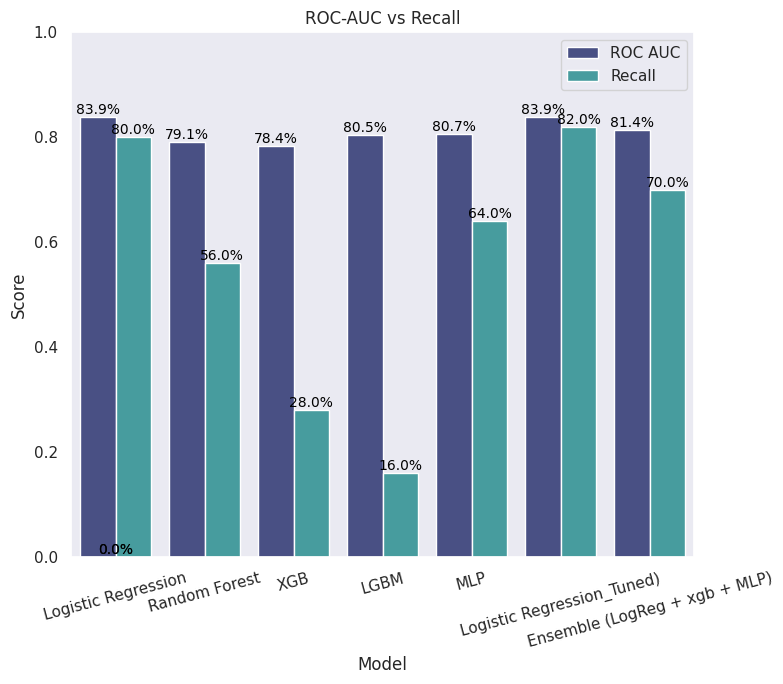

In [471]:
melted = results_df.melt(
    id_vars='Model',
    value_vars=['ROC AUC', 'Recall'],
    var_name='Metric',
    value_name='Score'

)

plt.figure(figsize=(8, 7))
barplot = sns.barplot(data=melted, x='Model', y='Score', hue='Metric',palette='mako')
plt.title('ROC-AUC vs Recall')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{100 * height:.1f}%',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=10, color='black', rotation=0)

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


- **Logistic Regression (Tuned)** achieved the **highest recall (≈ 0.82)** and **highest AUC (≈ 0.83)**, making it the most reliable model overall.
- **Random Forest** and **XGBoost** had decent AUC (0.79– 0.784) but ** low recall (0.56 – 0.28)**, indicating they missed most stroke cases.
- **LGBM** (0.80 and 0.16)
- **MLP** performed better in recall (0.64) than tree models, suggesting it captures non-linear patterns more effectively.
- **Ensemble (LogReg + MLP)** had good AUC (~0.814) and acceptable recall (0.70), making it a balanced alternative.
- **Untuned Logistic Regression** already performed well, and tuning improved it significantly.

**Model Interpretability with SHAP**

In [472]:
import shap
X_train_orig = X_train.reset_index(drop=True)
X_test_orig = X_test.reset_index(drop=True)
X_train_selected_orig = X_train_orig.loc[:, selected_features]
X_test_selected_orig = X_test_orig.loc[:, selected_features]

# Initialize SHAP explainer
explainer = shap.Explainer(model_lr, X_train_selected_orig)
shap_values = explainer(X_test_selected_orig)


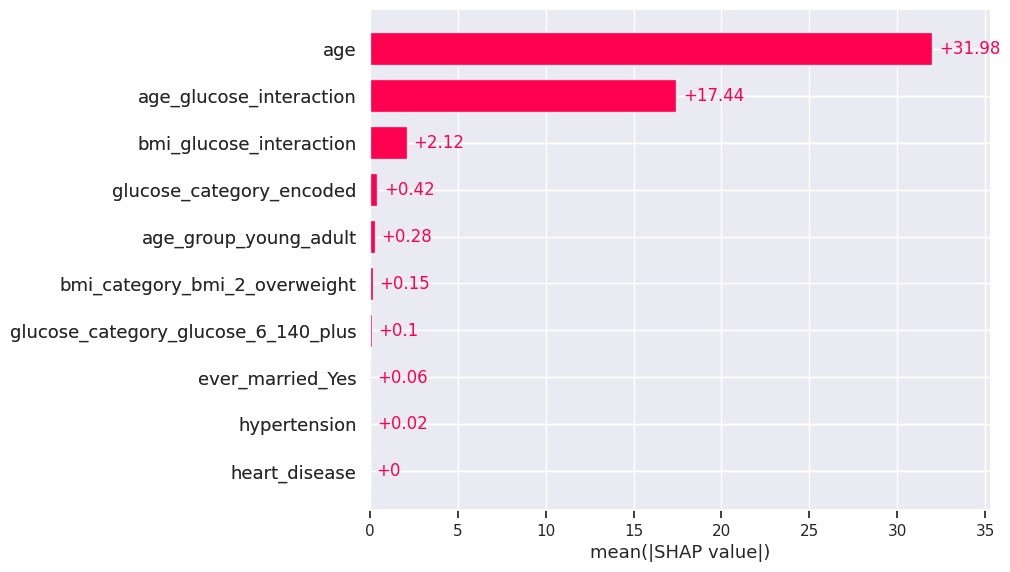

In [473]:
shap.plots.bar(shap_values)


 SHAP summary plot shows that age is by far the strongest predictor of stroke in our model. In addition, interaction features like age × glucose and BMI × glucose are also impactful, confirming that stroke risk is multifactorial. Interestingly, classical clinical features like hypertension and heart disease had low influence in the final model, possibly due to their binary nature and lower variation in the dataset.

## Conclusion

- This project successfully built a stroke prediction model using clinical and lifestyle features.
- After preprocessing, feature engineering, and SMOTE balancing, I trained 5 models.
- A soft voting ensemble with MLP slightly improved performance and robustness.
- Tuned Logistic Regression achieved the best performance with high recall and ROC- AUC.
- In a medical context where missing a stroke case is dangerous, recall is more important than overall accuracy, and this model excels in that priority.
- SHAP analysis confirmed age, glucose, and interaction features were most impactful.
- The model is interpretable, medically aligned, and useful for early stroke risk screening.
